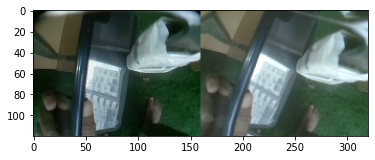

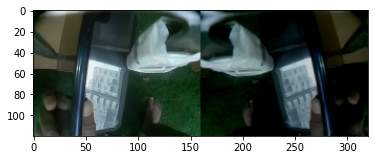

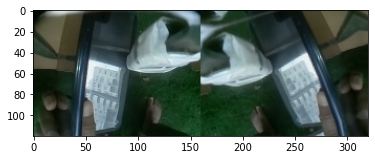

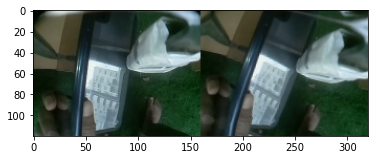

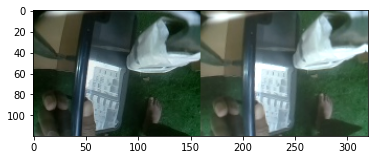

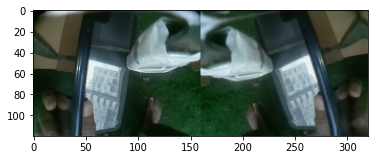

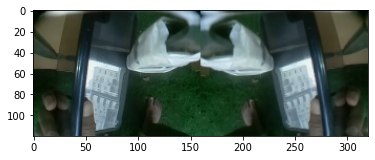

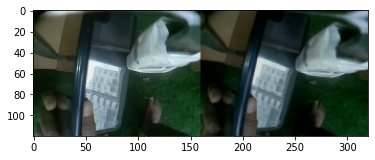

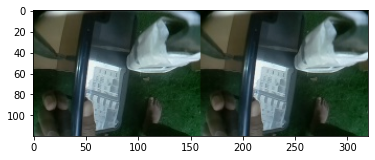

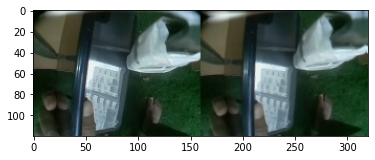

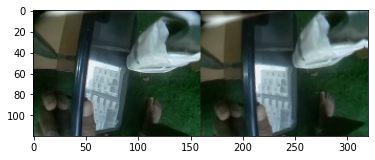

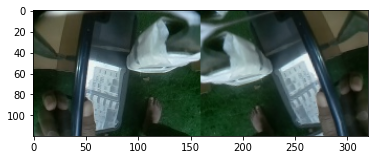

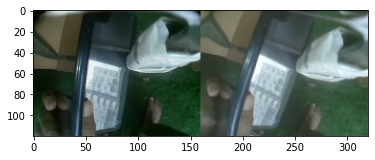

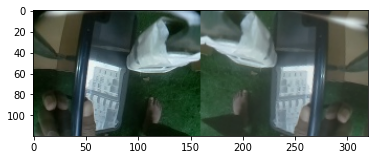

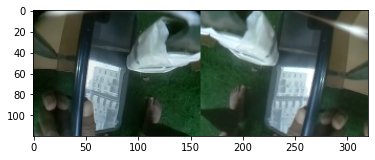

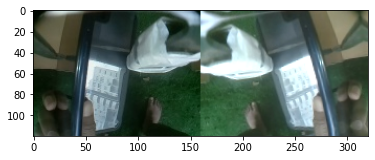

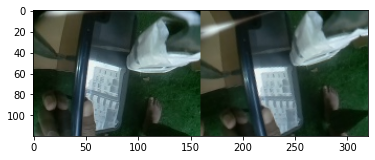

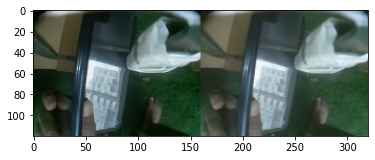

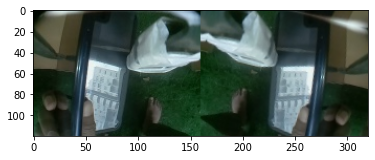

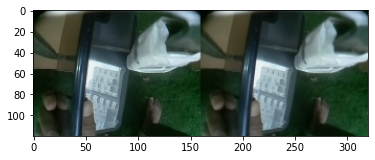

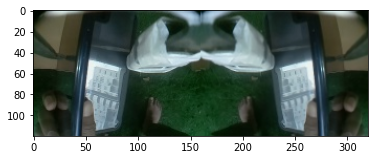

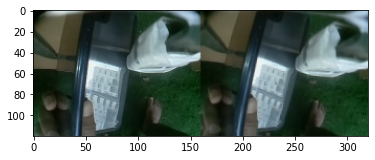

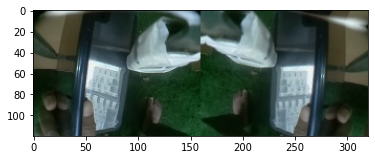

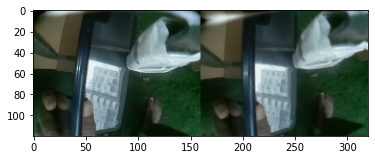

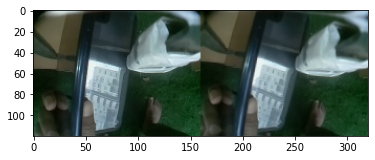

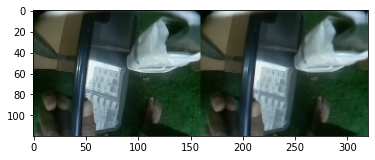

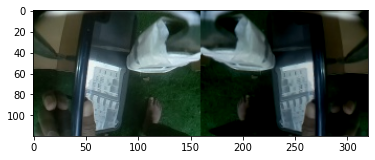

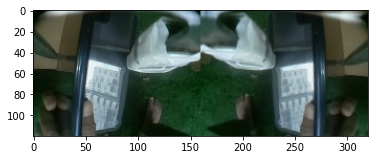

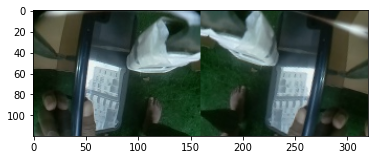

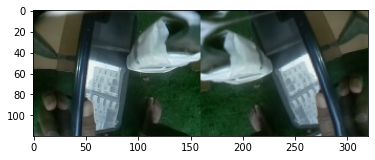

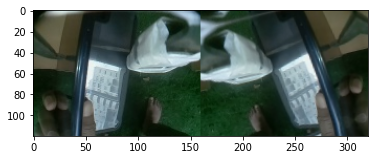

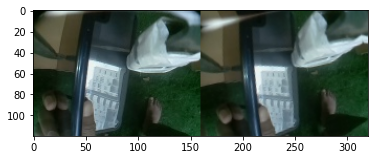

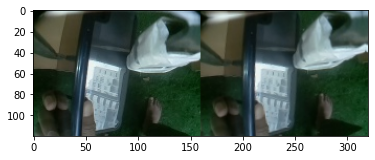

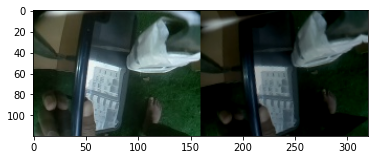

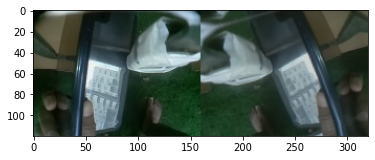

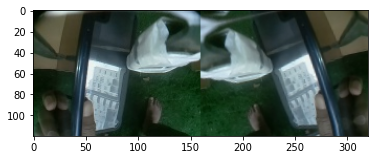

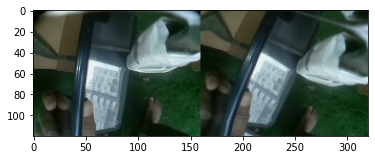

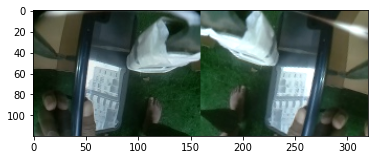

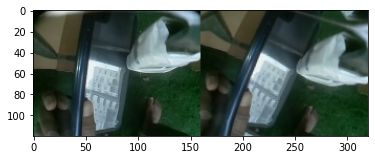

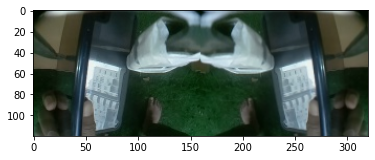

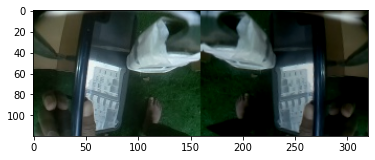

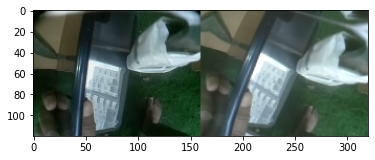

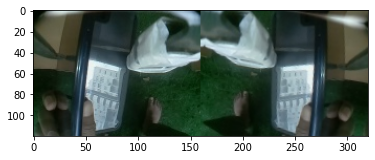

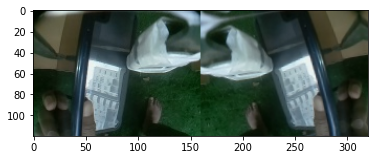

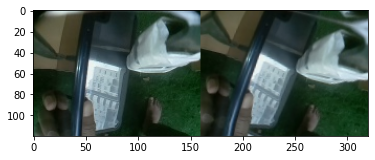

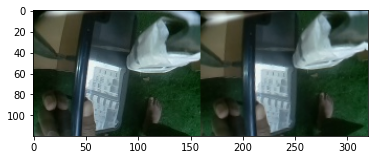

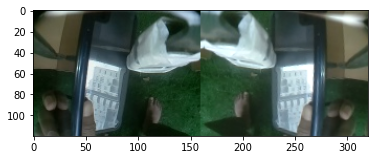

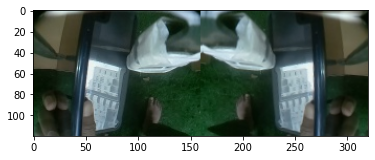

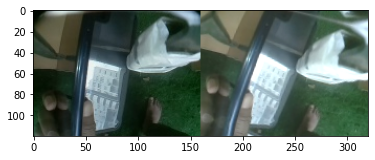

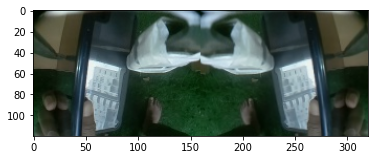

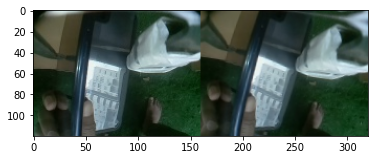

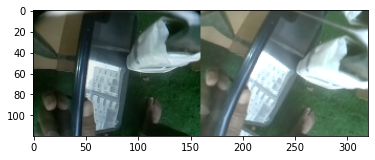

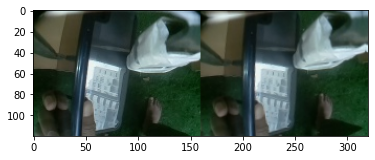

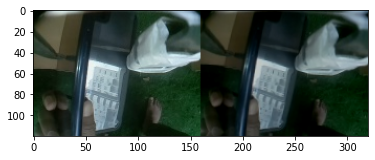

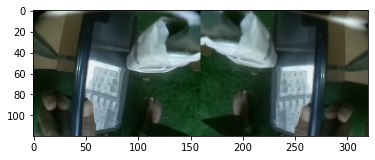

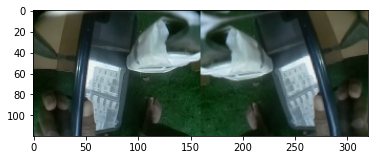

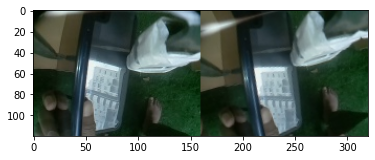

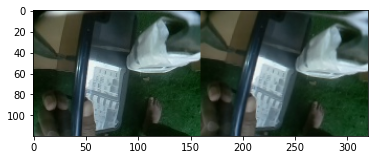

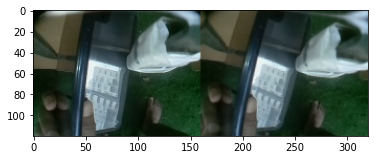

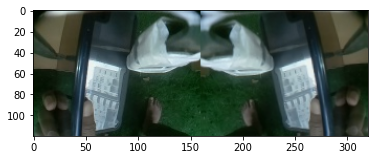

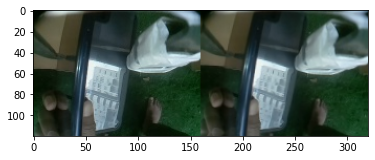

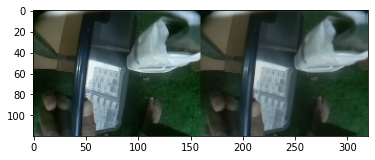

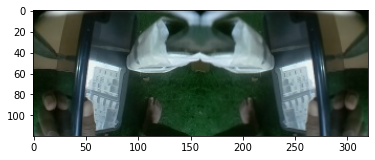

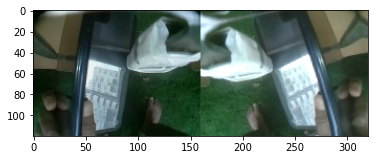

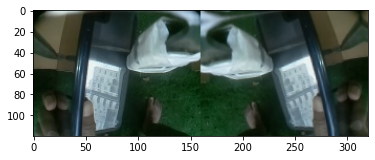

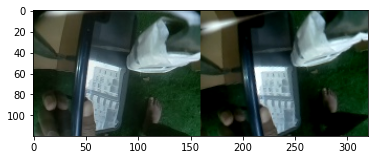

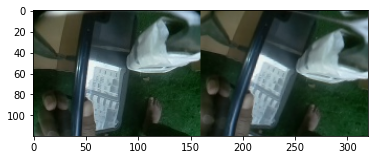

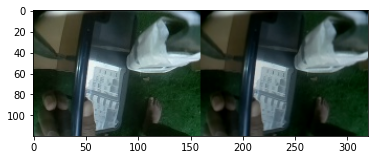

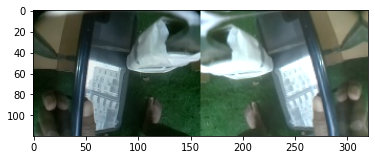

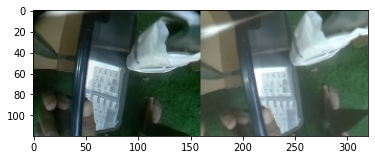

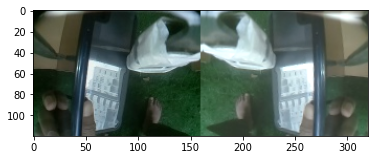

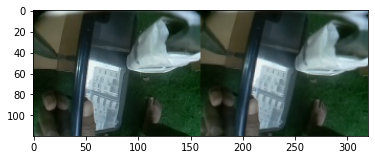

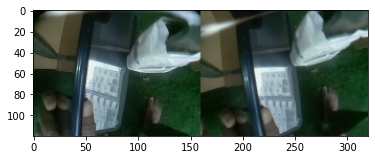

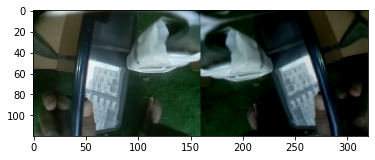

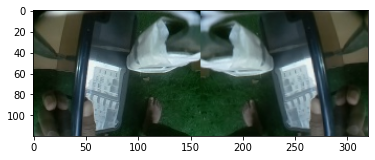

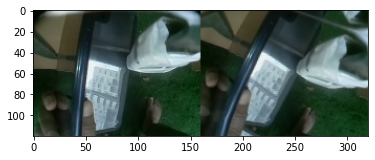

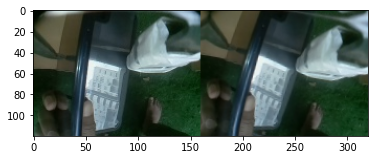

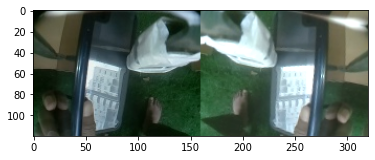

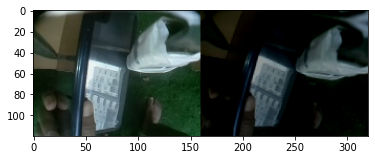

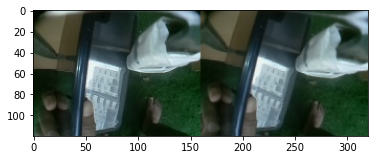

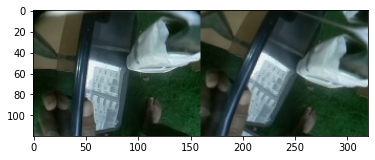

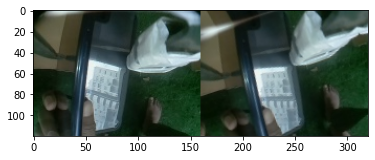

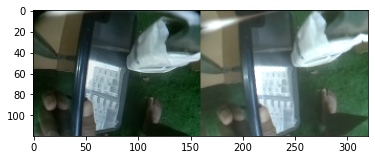

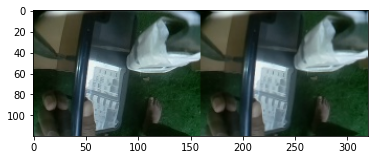

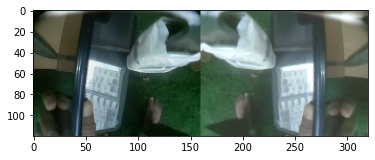

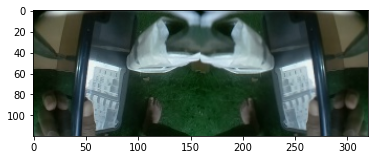

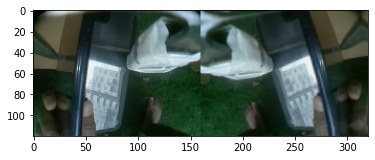

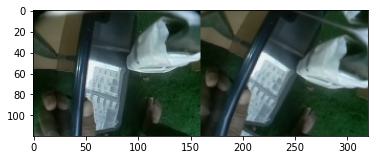

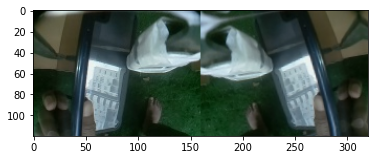

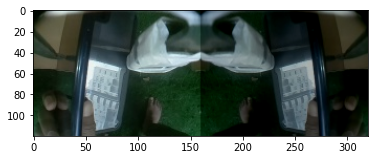

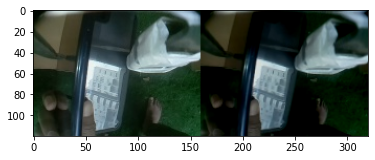

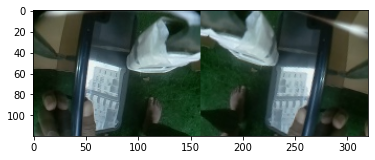

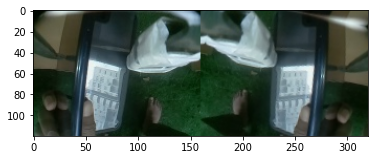

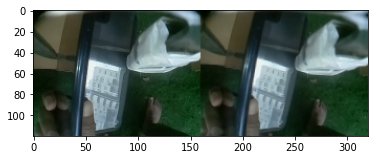

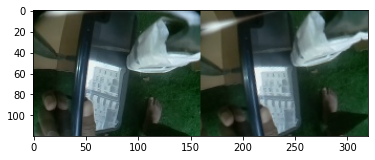

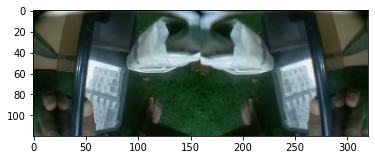

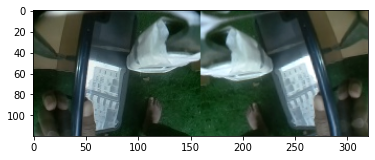

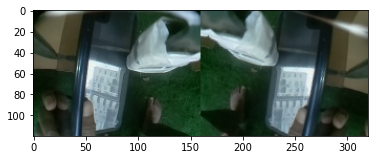

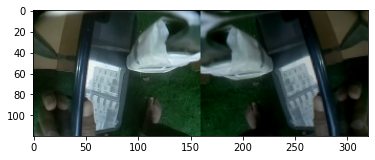

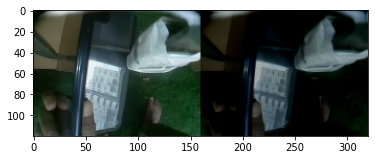

In [1]:
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, Rotate,
    RandomBrightnessContrast, HueSaturationValue,
    ShiftScaleRotate, RandomResizedCrop, RandomBrightnessContrast,
    MotionBlur, MedianBlur, GaussianBlur, GaussNoise, 
    ElasticTransform, GridDistortion, OpticalDistortion,
    Cutout, CoarseDropout, Blur, RGBShift, 
    CLAHE, ChannelShuffle, ToGray
)
import cv2
import numpy as np

# Define the augmentation pipeline
augmentation = Compose([
    HorizontalFlip(p=0.5),
#    VerticalFlip(p=0.5),
  Rotate(limit=20, p=1),
     RandomBrightnessContrast(p=0.3),
#     HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1),
#     ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=45, p=0.5),
#        RandomResizedCrop(height=120, width=160, scale=(0.3, 0.5), p=1),
#     MotionBlur(blur_limit=(15, 31), p=1),
#     MedianBlur(blur_limit=(5, 7), p=1),
#     GaussianBlur(blur_limit=(3, 7), p=1),
#     GaussNoise(var_limit=(100.0, 500.0), p=1),
#    ElasticTransform(alpha=1, sigma=10, alpha_affine=10, p=1),
#     GridDistortion(num_steps=5, distort_limit=0.3, p=1), #not imp
#     OpticalDistortion(distort_limit=0.3, shift_limit=0.3, p=1), # not imp
#     Cutout(num_holes=8, max_h_size=16, max_w_size=16, p=1),
#    CoarseDropout(max_holes=8, max_height=16, max_width=16, p=1), #imp
#     Blur(blur_limit=3, p=1), # Not imp gaussian blur will be enough
#     RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=1) # not imp\
 #   Shear(shar_limit=0.5, p=1),
])




from matplotlib import pyplot as plt

for i in range(100):
    img_list = []

    # Load an image
    image = cv2.imread("/home/aman/ai/single_img_data_training/train/none/16873233598408537.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img_list.append(image)

    # Apply the augmentation
    augmented_image = augmentation(image=image)['image']
    img_list.append(augmented_image)

    final_img = img_list[0]

    for img in img_list[1:]:
        final_img = np.concatenate((final_img, img), axis=1)    
    plt.imshow(final_img)
    plt.show()



In [2]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential

import numpy as np
# !pip install numpy==1.20
import matplotlib.pyplot as plt
# !pip install autokeras
# import autokeras as ak
import glob
import os, cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV3Large

from skimage.util import random_noise

In [3]:

BATCH_SIZE=3

IMAGE_SIZE_WIDTH= 80
IMAGE_SIZE_HEIGHT = 60 
NUM_CHANNEL = 3                                   

IMAGE_SHAPE = (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH) #(height, width)
MODEL_IMAGE_SHAPE = (IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH, NUM_CHANNEL) 

In [4]:
train_data_dir='/home/aman/ai/single_img_data_training/train'
val_data_dir='/home/aman/ai/single_img_data_training/val'

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator





# from tensorflow.keras.layers.preprocessing.image_preprocessing import HORIZONTAL

train_datagen=ImageDataGenerator(   rotation_range=15,       # Rotate images randomly up to 20 degrees
                                    width_shift_range=0.15,   # Shift the width by a fraction of the total width
                                    height_shift_range=0.15,  # Shift the height by a fraction of the total height
                                    zoom_range=0.15,# Randomly zoom into images by up to 20%
                                    shear_range=0.15, 
#                                     zca_whitening= True,
                                    brightness_range=[0.9, 1.35], 
                                 )

val_datagen=ImageDataGenerator(#rescale=1./255
                               )




train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=IMAGE_SHAPE, # accept height and wdith order
                                                  batch_size=BATCH_SIZE,
#                                                   color_mode="grayscale",
                                                  class_mode='sparse',
                                                  
                                                 )

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
#                                               color_mode="grayscale",
                                              class_mode='sparse')






Found 3170 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [6]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=IMAGE_SHAPE, # accept height and wdith order
                                                  batch_size=16,
#                                                   color_mode="grayscale",
                                                  class_mode='sparse',
                                                  
                                                 )
def train_gen():

    
    for train_x, train_y in train_generator:
        for i in range(train_x.shape[0]):
            #print(train_x[0].shape)
            train_x[i] = augmentation(image=train_x[i])["image"]
            #pass
        
        #print("yeild")
        yield train_x, train_y    

Found 3170 images belonging to 3 classes.


In [7]:

from tensorflow.keras.applications import MobileNetV3Small
num_classes = 3

base_model = MobileNetV3Small(
                                input_shape=(60, 80, 3),
                                alpha=0.01,
                                dropout_rate=0.2,
                                minimalistic=True, # if True, aims to provide a lightweight and efficient model for image classification tasks with minimal computational resources.
                                 
                                include_top=False,
                                weights=None , #'imagenet' , None
                                
                             )
base_model.trainable = True

print(base_model.summary())

model = tf.keras.Sequential([
    base_model,
#     layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 80, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 60, 80, 3)    0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 30, 40, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 30, 40, 16)  64          ['Conv[0][0]']                   
 tion)                                                                             

                                                                 rm[0][0]',                       
                                                                  'expanded_conv_2/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_3/expand (Conv2D  (None, 8, 10, 32)   256         ['expanded_conv_2/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_3/expand/BatchNo  (None, 8, 10, 32)   128         ['expanded_conv_3/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 re_lu_6 (

                                                                                                  
 expanded_conv_5/Add (Add)      (None, 4, 5, 8)      0           ['expanded_conv_4/Add[0][0]',    
                                                                  'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 4, 5, 24)    192         ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 4, 5, 24)    96          ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
          

 D)                                                                                               
                                                                                                  
 expanded_conv_8/project/BatchN  (None, 2, 3, 8)     32          ['expanded_conv_8/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_conv_9/expand (Conv2D  (None, 2, 3, 48)    384         ['expanded_conv_8/project/BatchNo
 )                                                               rm[0][0]']                       
                                                                                                  
 expanded_conv_9/expand/BatchNo  (None, 2, 3, 48)    192         ['expanded_conv_9/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
          

In [8]:
from tensorflow.keras import Model

# Get the number of layers in the base model
num_layers = len(base_model.layers)

# Create a new model without the last 10 layers
new_base_model = Model(base_model.input, base_model.layers[num_layers-75-1].output)

new_base_model.trainable = True

# Print summary
print(new_base_model.summary())

model = tf.keras.Sequential([
    new_base_model,
    Conv2D(3, (3, 3), strides=(2, 2), padding='valid', use_bias=True),
#     layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
#     layers.Dense(16, activation='relu'),
#     layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 80, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 60, 80, 3)    0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 30, 40, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 30, 40, 16)  64          ['Conv[0][0]']                   
 tion)                                                                                        

                                                                 rm[0][0]',                       
                                                                  'expanded_conv_2/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
Total params: 3,304
Trainable params: 2,904
Non-trainable params: 400
__________________________________________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8, 10, 8)          3304      
                                                                 
 conv2d (Conv2D)             (None, 3, 4, 3)           219       
                                                                 
 flatten_1 (

In [ ]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("image_classification_checkpoint.h5",
                             monitor='val_sparse_categorical_accuracy',
                             mode='max',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

# callbacks=[checkpoint,earlystop]
callbacks=[checkpoint]
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['sparse_categorical_accuracy'])

epochs=100

batch_size = 16

steps_per_epoch = len(train_generator)

history = model.fit(     train_gen(),
                        #  steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                        #validation_split=0.15,
                        callbacks=callbacks,
                         validation_data=val_generator,
                        #  validation_steps=num_val_samples//batch_size
                        #class_weight=class_weights,
                    steps_per_epoch=steps_per_epoch
                    )

Epoch 1/100
198/199 [============================>.] - ETA: 0s - loss: 1.4807 - sparse_categorical_accuracy: 0.3494
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.33333, saving model to image_classification_checkpoint.h5
199/199 [==============================] - 9s 33ms/step - loss: 1.4808 - sparse_categorical_accuracy: 0.3492 - val_loss: 1.0993 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/100
197/199 [============================>.] - ETA: 0s - loss: 1.1267 - sparse_categorical_accuracy: 0.4064
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.33333
199/199 [==============================] - 6s 31ms/step - loss: 1.1263 - sparse_categorical_accuracy: 0.4073 - val_loss: 1.0998 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/100
197/199 [============================>.] - ETA: 0s - loss: 1.0085 - sparse_categorical_accuracy: 0.4822
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.33333
199/199 [==============================] - 6s 31m